<figure>
  <IMG SRC="Logo.png"  WIDTH=150 ALIGN="right">
</figure>

## Projections of mean sea level and tides<br>
### Paper in Journal of Coastal and Hydraulic Structures
<b>Prepared by: H.G. Voortman</b>


<figure>
    <IMG SRC="https://www.python.org/static/community_logos/python-powered-w-200x80.png"  WIDTH=100 ALIGN="right">
</figure>

#### Description
- Analyses described in section 5 of the paper

#### Packages

In [16]:
# General packages
import os
import copy as cp
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq
import numpy as np
#import sigfig as sf
import scipy.stats as stat
from itertools import islice, cycle

import hvec_stat.general_fit as gf
import hvec_stat.plotting as stplot
import hvec_stat.goodness_of_fit as gof
import hvec_stat.support as sup
import hvec_stat.statistical_tests as sttests
import regressionModels as mdl
import utils as prj

from constants import *

In [17]:
YR_START = 1945

In [18]:
# Settings
plt.rcParams['axes.grid'] = True
figsize = (20, 18)

#### Connect databases and import data

##### Data IPCC

In [19]:
path = os.getenv('DATAPATH')
name = 'IPCC.db'
name = os.path.join(path, name)
cnxn = sq.connect(name, detect_types = True)

In [20]:
names = tuple([nm.upper() for nm in names])
names

('DELFZIJL',
 'HARLINGEN',
 'DEN HELDER',
 'IJMUIDEN',
 'HOEK VAN HOLLAND',
 'VLISSINGEN')

In [25]:
sql = (
    "SELECT year, name, median*1000 as median FROM data "
    "WHERE process = 'totalrates' "
    "AND scenario = 'ssp245' "
    f"AND name IN {names}"
)
ipcc = pd.read_sql(sql, cnxn)
ipcc

,year,name,median
0,2020,DELFZIJL,4.8
1,2030,DELFZIJL,5.1
2,2040,DELFZIJL,6.0
3,2050,DELFZIJL,6.4
4,2060,DELFZIJL,6.4
...,...,...,...
79,2110,VLISSINGEN,7.0
80,2120,VLISSINGEN,6.9
81,2130,VLISSINGEN,6.8
82,2140,VLISSINGEN,6.7


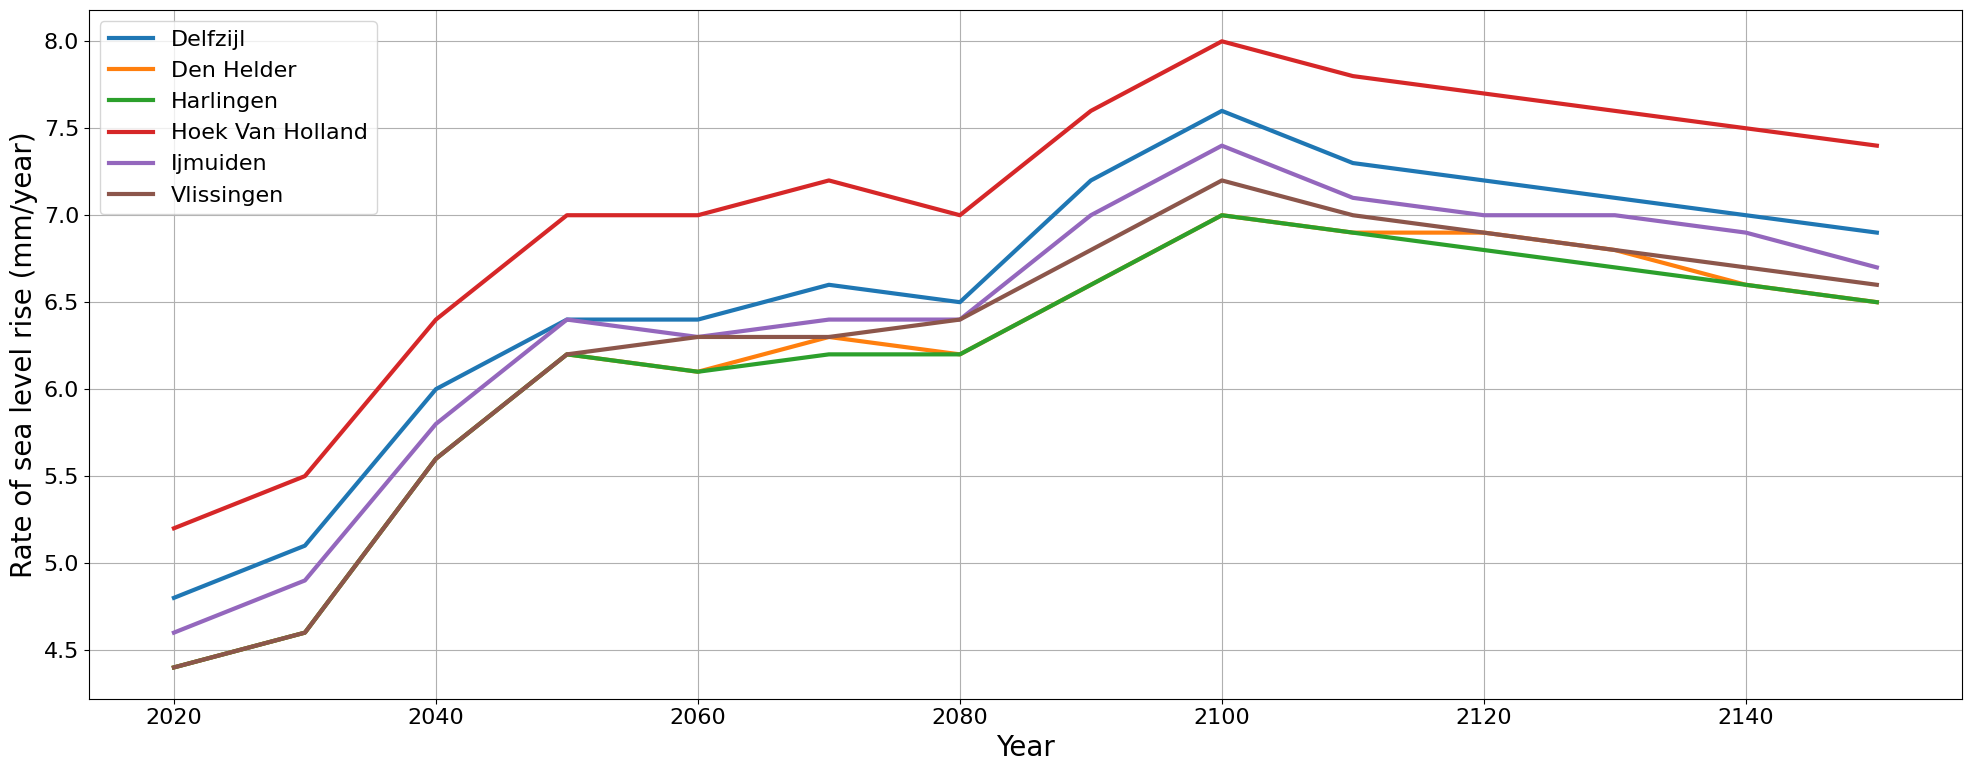

In [32]:
fig, ax = plt.subplots(figsize = (20, 8))
ipcc.groupby('name').apply(lambda df: df.plot(x = 'year', y = 'median', ax = ax, label = df['name'].unique().item().title(), linewidth = 3))
ax.set_xlabel('Year')
ax.set_ylabel('Rate of sea level rise (mm/year)')
fig.tight_layout()
fig.savefig(f'{PICTURES}/ipcc_rates_in_time.jpg');

#### End script
Prepared by HVEC lab, 2022